In [132]:
import os
import time
import pandas as pd
import matplotlib.pyplot as plt
from selenium.webdriver import Chrome
from underthesea import word_tokenize
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from selenium.webdriver.chrome.service import Service
from sklearn.feature_extraction.text import TfidfVectorizer
from selenium.webdriver.support.ui import WebDriverWait as WDW
from selenium.webdriver.support import expected_conditions as EC
from sklearn.metrics import f1_score, accuracy_score, precision_score

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [42]:
DG = "Disgust"
EJ = "Enjoyment"
AG = "Anger"
SP = "Surprise"
SN = "Sadness"
FE = "Fear"
HU = "Hurt"
LO = "Lonely"
HP = "Hopeless"
SPAM = "Spam"
DS = "Dissappointed"
AC = "Accepting"
IN = "Indifferent"
HN = "Highly negative"
OT = "Other"

In [43]:
os.makedirs("data", exist_ok=True)
os.makedirs("emotion", exist_ok=True)

In [44]:
# Create ChromeDriver to executable that Selenium WebDriver uses to control Chrome
def ChromeDriver(url,t):
    data = []
    service = Service(executable_path=r'D:\hoctrentruong\DAT\project\Emotion-Regconition-Youtube-main\Emotion-Regconition-Youtube-main/chromedriver.exe')
    with Chrome(service=service) as ChD:
        wait = WDW(ChD,t)
        ChD.get(url)
        for item in range(101): 
            wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END)
            time.sleep(t)
        for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
            if(len(str(comment.text))>10): # Do not accept short comment or doesn't mean much
                data.append(comment.text)
            if(len(data)==103): # 100 comments + 3(title,description,first comment of Khoa Pug)
                break
    return data

def getData_Video(url,t):
    data = ChromeDriver(url,t)
    while(len(data)==103):
        for i in range(3): # Remove 3(title,description,first comment of Khoa Pug)
            data.pop(0)
        print("Success!! Crawled 100 comments from Video [" + url.split("v=")[1] + "]!")
        return data
    print("Failed!! Please try again.")
    return data

In [45]:
def getData_Video(url, t):
    comments = ChromeDriver(url, t)
    return pd.DataFrame({"comment": comments})

In [46]:
url1 = "https://www.youtube.com/watch?v=hassqXTvsXM"
url2 = "https://www.youtube.com/watch?v=RG-dXrbRNuw"
url3 = "https://www.youtube.com/watch?v=ipSpPzFqNH0"
url4 = "https://www.youtube.com/watch?v=_cKeLsxwRSU"
url5 = "https://www.youtube.com/watch?v=4CAQ4odYfhI"

In [47]:
df1 = getData_Video(url1, 0.035)

In [48]:
df2 = getData_Video(url2, 0.035)

In [51]:
df3 = getData_Video(url3,0.035)

In [68]:
df4 = getData_Video(url4,0.035)

In [69]:
df5 = getData_Video(url5,0.035)

In [70]:
df1.to_excel("data/data1.xlsx", index=False)
df2.to_excel("data/data2.xlsx", index=False)
df3.to_excel("data/data3.xlsx", index=False)
df4.to_excel("data/data4.xlsx", index=False)
df5.to_excel("data/data5.xlsx", index=False)
print("Đã lưu data vào thư mục 'data/'")

Đã lưu data vào thư mục 'data/'


In [71]:
emotion_keywords = {
    DG: ["kinh tởm", "ghê", "ghê tởm"],
    EJ: ["tuyệt vời", "vui", "hay quá", "cười", "đáng yêu", "xuất sắc"],
    AG: ["giận", "bực", "tức", "điên", "cay"],
    SP: ["bất ngờ", "ngạc nhiên", "wow"],
    SN: ["buồn", "khóc", "tổn thương"],
    FE: ["sợ", "lo", "hoảng"],
    HU: ["đau", "tổn thương", "đau lòng"],
    LO: ["cô đơn", "một mình", "lạc lõng"],
    HP: ["tuyệt vọng", "chán sống", "vô vọng"],
    SPAM: ["link", "sub chéo", "mua hàng"],
    DS: ["thất vọng", "chán", "đáng thất vọng"],
    AC: ["chấp nhận", "ok", "ổn mà"],
    IN: ["bình thường", "không quan tâm", "meh"],
    HN: ["cực kỳ tệ", "rác", "tệ hại", "không thể chấp nhận"],
}

In [72]:
def assign_emotion(text):
    lowered = text.lower()
    for emo, keywords in emotion_keywords.items():
        if any(kw in lowered for kw in keywords):
            return emo
    return OT

In [73]:
def label_and_save(df, filename):
    df["emotion"] = df["comment"].apply(assign_emotion)
    df.to_excel(f"emotion/{filename}", index=False)
    print(f"Đã lưu dữ liệu gán nhãn vào emotion/{filename}")

In [74]:
label_and_save(df1, "emotion1.xlsx")
label_and_save(df2, "emotion2.xlsx")
label_and_save(df3, "emotion3.xlsx")
label_and_save(df4, "emotion4.xlsx")
label_and_save(df5, "emotion5.xlsx")

Đã lưu dữ liệu gán nhãn vào emotion/emotion1.xlsx
Đã lưu dữ liệu gán nhãn vào emotion/emotion2.xlsx
Đã lưu dữ liệu gán nhãn vào emotion/emotion3.xlsx
Đã lưu dữ liệu gán nhãn vào emotion/emotion4.xlsx
Đã lưu dữ liệu gán nhãn vào emotion/emotion5.xlsx


In [75]:
if os.path.exists("data6.csv"):
    df6 = pd.read_csv("data6.csv")
    if "comment" in df6.columns:
        label_and_save(df6, "emotion6.xlsx")
    else:
        print("File data6.csv không có cột 'comment'")
else:
    print("Không tìm thấy file data6.csv")

Đã lưu dữ liệu gán nhãn vào emotion/emotion6.xlsx


In [76]:
emotion_dir = "emotion/"
all_files = [f for f in os.listdir(emotion_dir) if f.endswith(".xlsx")]

dataList = pd.concat(
    [pd.read_excel(os.path.join(emotion_dir, file)) for file in all_files],
    ignore_index=True
)
dataList["Length"] = dataList["comment"].apply(lambda x: len(str(x).split()))
dataList.rename(columns={"emotion": "Emotion"}, inplace=True)


In [77]:
emotion_labels = {
    "DG": "Disgust",
    "EJ": "Enjoyment",
    "AG": "Anger",
    "SP": "Surprise",
    "SN": "Sadness",
    "FE": "Fear",
    "HU": "Hurt",
    "LO": "Lonely",
    "HP": "Hopeless",
    "SPAM": "Spam",
    "DS": "Dissappointed",
    "AC": "Accepting",
    "IN": "Indifferent",
    "HN": "Highly negative",
    "OT": "Other"
}

# Màu sắc cho biểu đồ (tuỳ chọn, phải khớp với số nhãn)
colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k', 'orange', 'pink', 'gray', 'purple', 'brown', 'olive', 'teal', 'navy']

def Show_HistGraph_And_PieChart(df):
    emotion_mapping = {
        "DG": "Disgust", "EJ": "Enjoyment", "AG": "Anger", "SP": "Surprise",
        "SN": "Sadness", "FE": "Fear", "HU": "Hurt", "LO": "Lonely",
        "HP": "Hopeless", "SPAM": "Spam", "DS": "Dissappointed", "AC": "Accepting",
        "IN": "Indifferent", "HN": "Highly negative", "OT": "Other"
    }

    df["Emotion"] = df["Emotion"].map(emotion_mapping)
    df = df[df["Emotion"].notna()]  # Loại bỏ hàng không xác định

    # Histogram
    plt.figure(figsize=(10, 4))
    df["Emotion"].value_counts().plot(kind='bar', color='skyblue')
    plt.title("Biểu đồ Histogram cảm xúc")
    plt.ylabel("Số lượng")
    plt.xlabel("Loại cảm xúc")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Pie chart
    plt.figure(figsize=(7, 7))
    df["Emotion"].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title("Biểu đồ tròn tỷ lệ cảm xúc")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

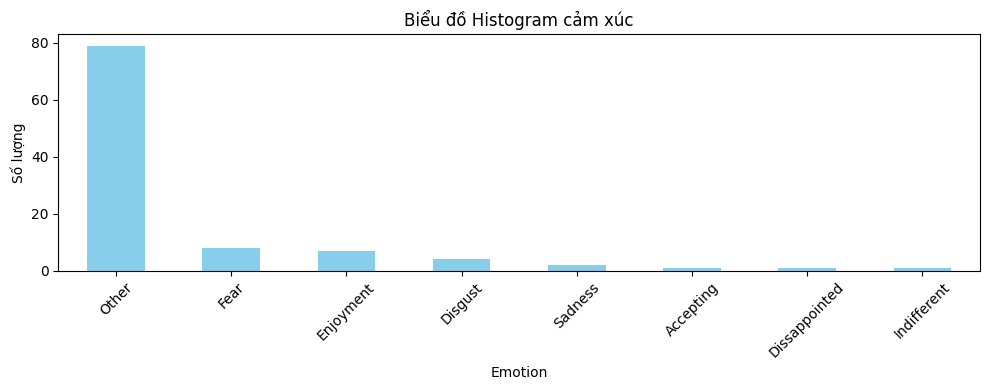

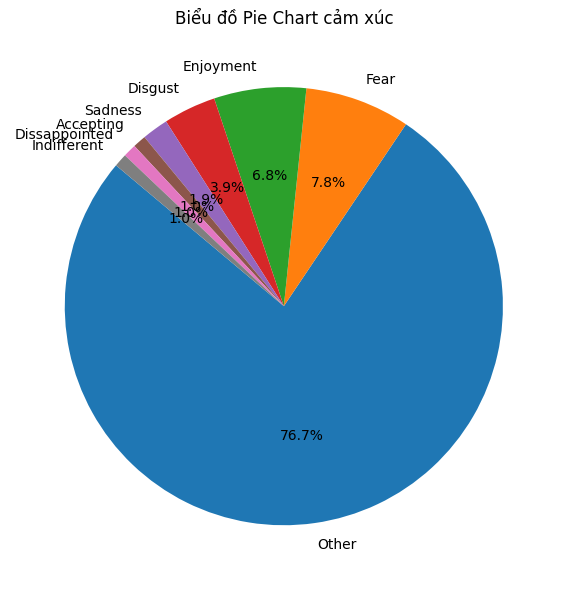

In [66]:
Show_HistGraph_And_PieChart(df)

In [78]:
print(df["Emotion"].unique())

['Disgust' 'Enjoyment' 'Other' 'Sadness' 'Accepting' 'Fear'
 'Dissappointed' 'Indifferent']


In [98]:
def Show_HistGraph_And_PieChart(dataList, dataset_name=""):
    # Danh sách ánh xạ mã cảm xúc sang tên đầy đủ
    emotion_map = {
        'DG': "Disgust", 'EJ': "Enjoyment", 'AG': "Anger", 'SP': "Surprise",
        'SN': "Sadness", 'FE': "Fear", 'HU': "Hurt", 'LO': "Lonely",
        'HP': "Hopeless", 'SPAM': "Spam", 'DS': "Dissappointed",
        'AC': "Accepting", 'IN': "Indifferent", 'HN': "Highly negative", 'OT': "Other"
    }

    # Danh sách màu sắc cho từng cảm xúc
    colors = [
        'b', 'r', 'g', 'c', 'm', 'y', 'k', '#ff9999', '#66b3ff', '#99ff99', 
        '#ffcc99', '#c2c2f0', '#ffb3e6', '#c0c0c0', '#8c564b'
    ]

    # Tạo danh sách các độ dài câu cho từng cảm xúc
    emotion_lengths = []
    labels = []
    for i, (short_code, full_name) in enumerate(emotion_map.items()):
        lengths = dataList.loc[dataList.Emotion == full_name, 'Length']
        if not lengths.empty:
            emotion_lengths.append(lengths)
            labels.append(short_code)

    if not emotion_lengths:
        print("Không có dữ liệu cảm xúc hợp lệ sau khi ánh xạ.")
        return

    # Histogram
    plt.figure(figsize=(8, 4))
    config = dict(alpha=0.4, bins=30, edgecolor="black")
    for i, lengths in enumerate(emotion_lengths):
        plt.hist(lengths, **config, color=colors[i % len(colors)], label=labels[i])
    plt.ylabel('Frequency')
    plt.xlabel('Sentence Length')
    plt.title(f"Biểu đồ Histogram cảm xúc {dataset_name}")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Pie Chart
    Pie = [len(lengths) for lengths in emotion_lengths]
    plt.figure(figsize=(5, 5))
    plt.pie(Pie, labels=labels, autopct='%1.0f%%', startangle=90, colors=colors[:len(labels)])
    plt.title(f"Biểu đồ Pie cảm xúc {dataset_name}")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

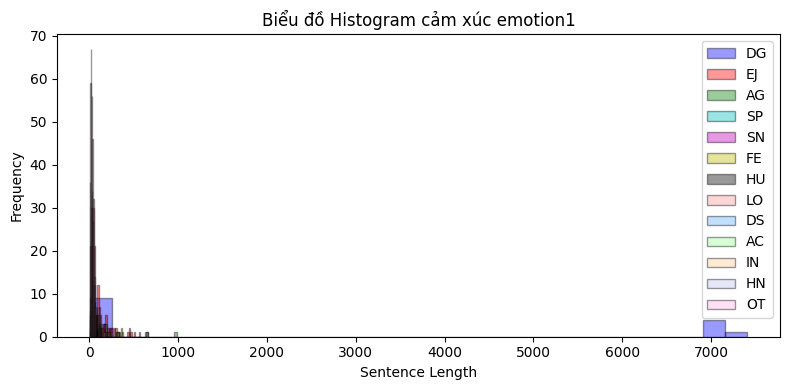

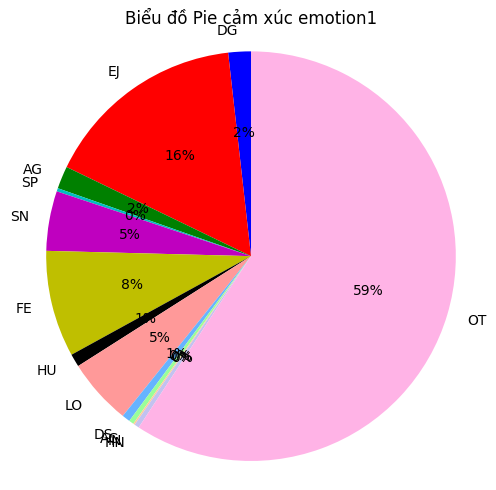

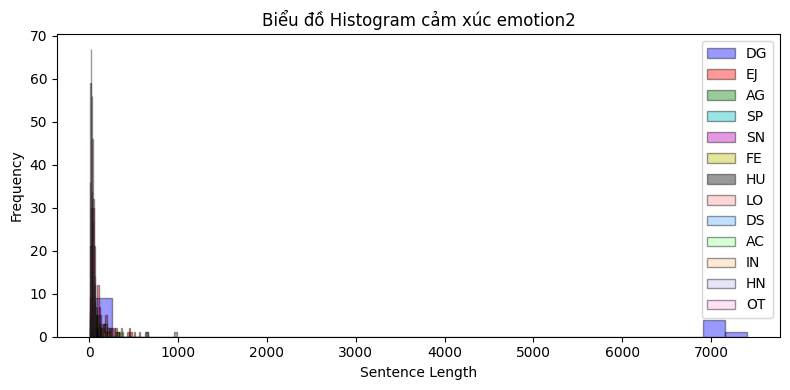

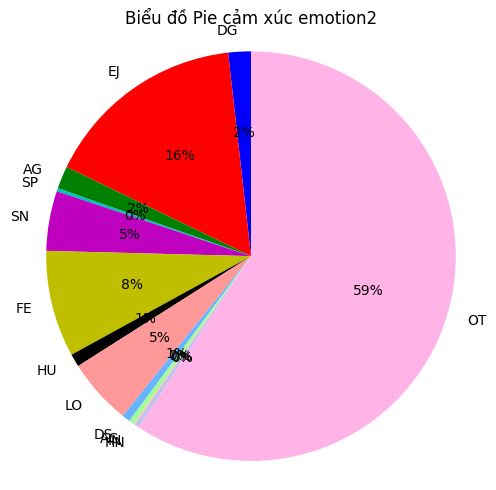

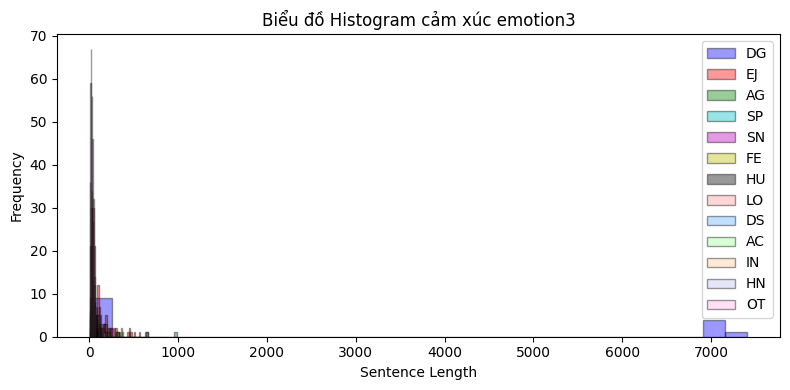

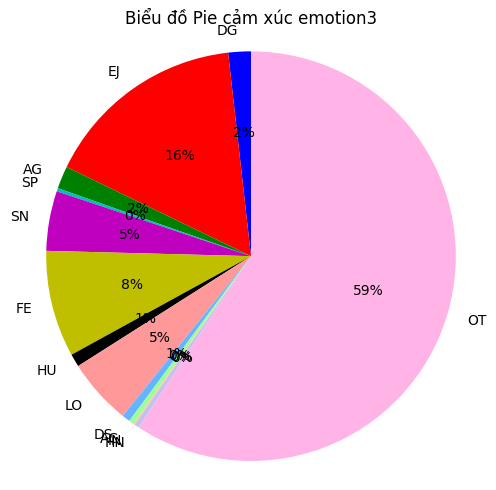

In [101]:
Show_HistGraph_And_PieChart(dataList, "emotion1")
Show_HistGraph_And_PieChart(dataList, "emotion2")
Show_HistGraph_And_PieChart(dataList, "emotion3")

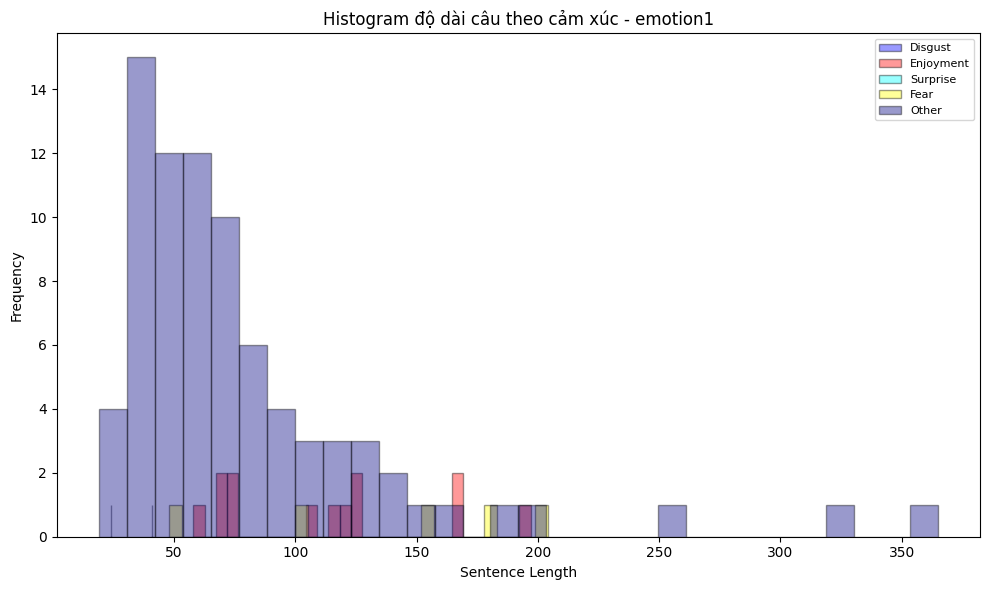

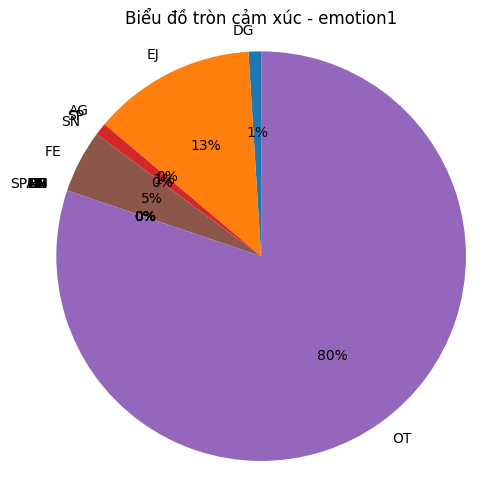

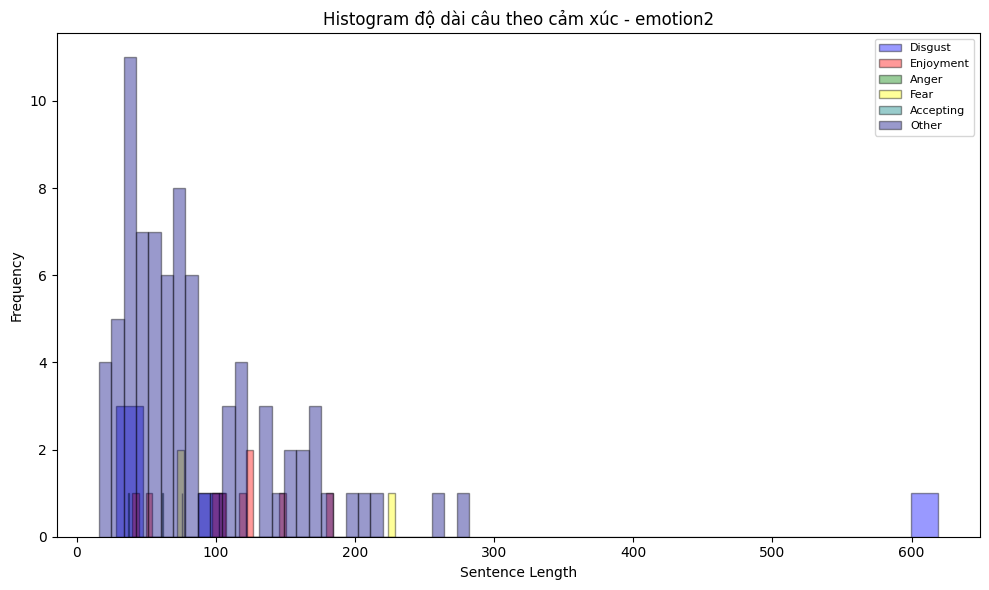

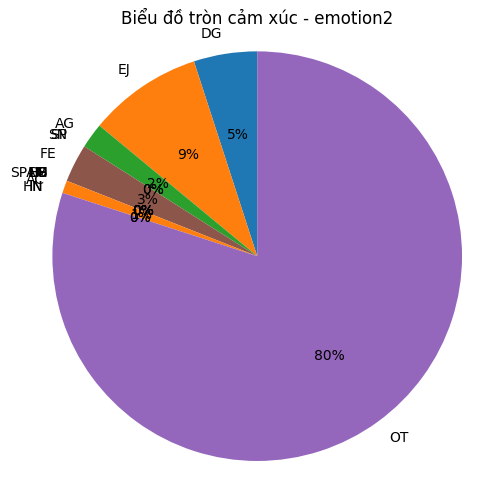

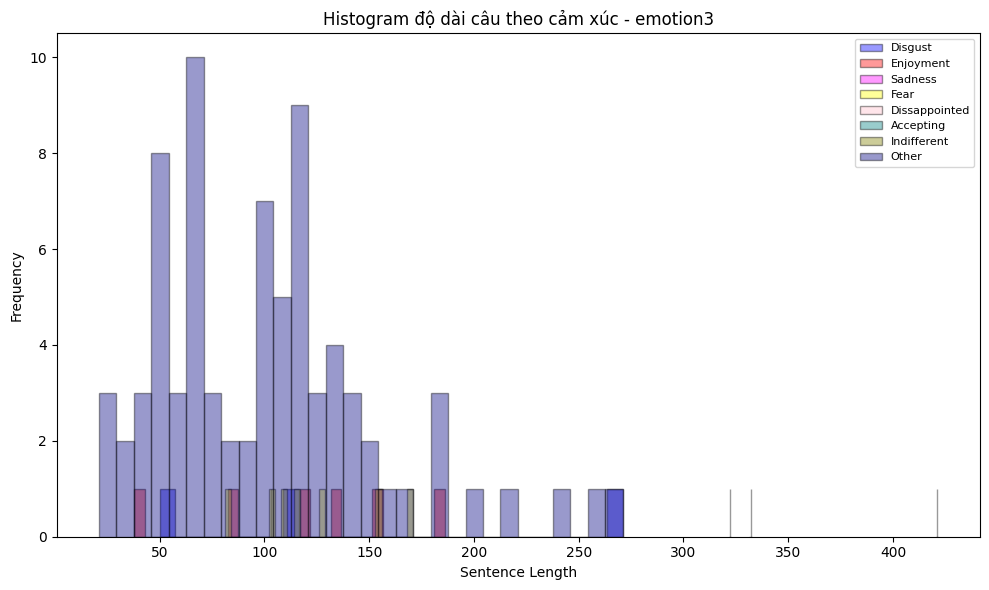

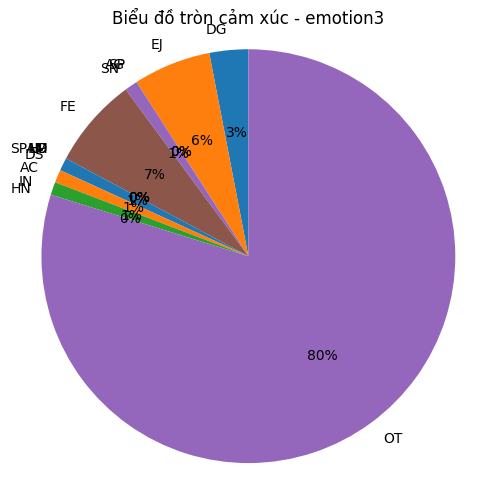

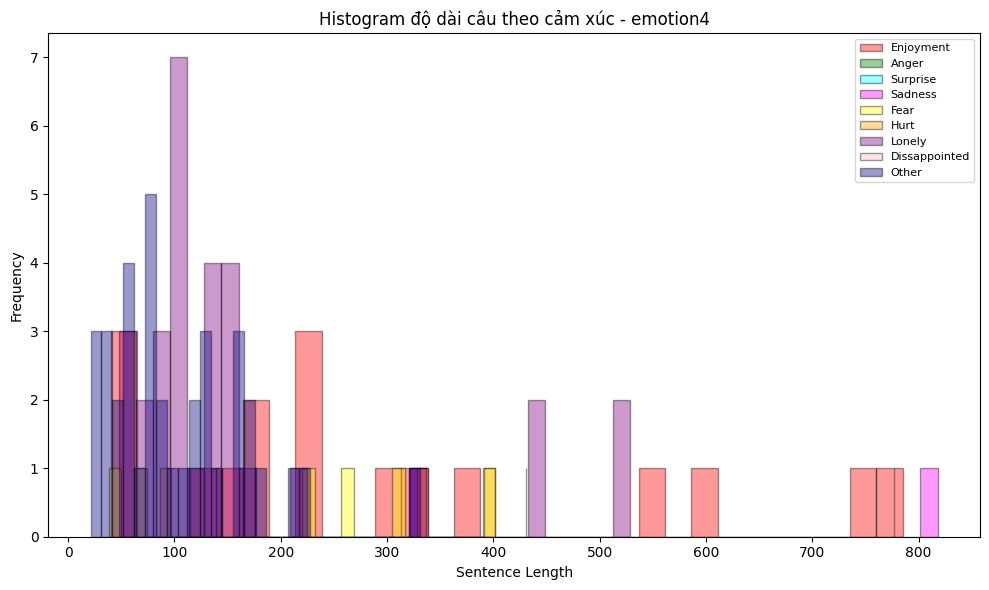

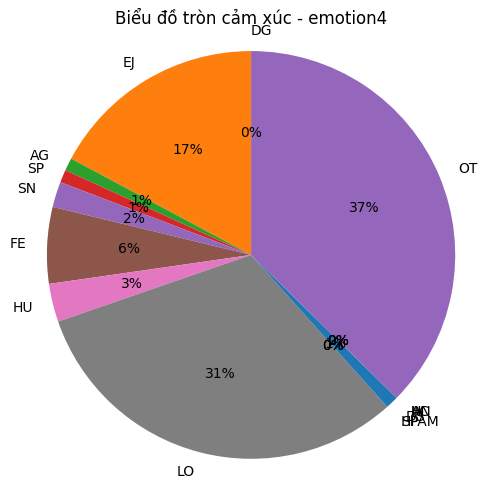

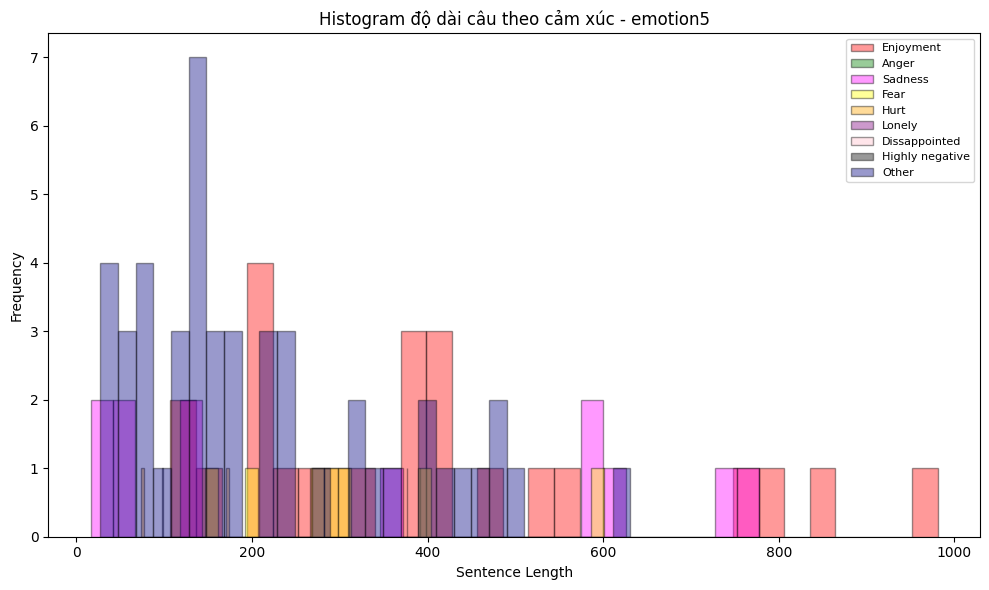

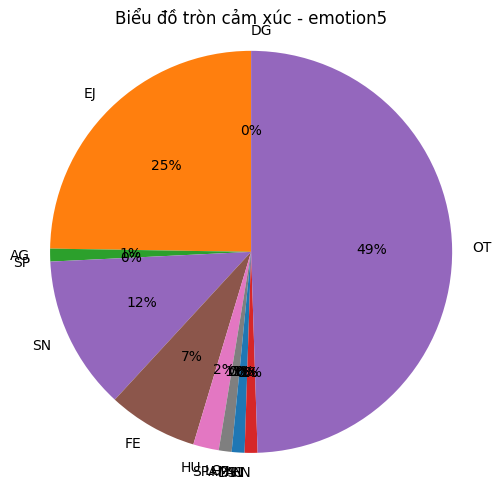

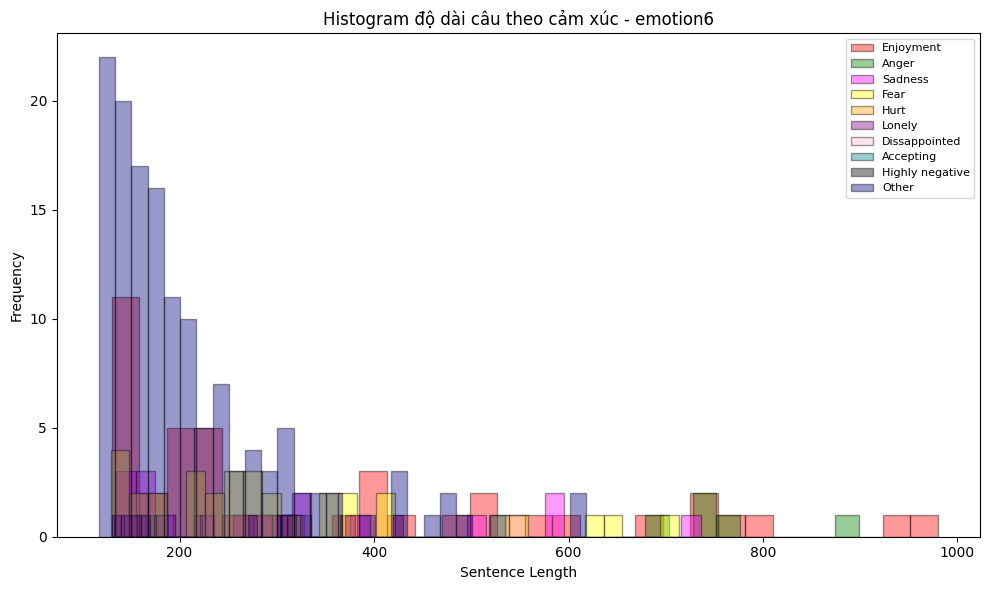

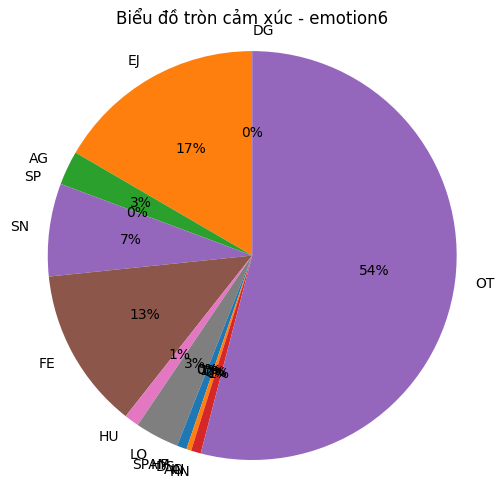

In [ ]:
emotions = {
    "DG": "Disgust", "EJ": "Enjoyment", "AG": "Anger", "SP": "Surprise", "SN": "Sadness",
    "FE": "Fear", "HU": "Hurt", "LO": "Lonely", "HP": "Hopeless", "SPAM": "Spam",
    "DS": "Dissappointed", "AC": "Accepting", "IN": "Indifferent", "HN": "Highly negative",
    "OT": "Other"
}

# Các cảm xúc cần hiển thị
selected_keys = ["DG", "EJ", "AG", "SP", "SN", "FE", "HU", "LO", "HP", "SPAM", "DS", "AC", "IN", "HN", "OT"]

# Màu tương ứng cho từng cảm xúc
color_map = {
    "DG": 'blue',
    "EJ": 'red',
    "AG": 'green',
    "SP": 'cyan',
    "SN": 'magenta',
    "FE": 'yellow',
    "HU": 'orange',
    "LO": 'purple',
    "HP": 'brown',
    "SPAM": 'gray',
    "DS": 'pink',
    "AC": 'teal',
    "IN": 'olive',
    "HN": 'black',
    "OT": 'navy'
}

def Show_HistGraph_And_PieChart(filename, label):
    dataList = pd.read_excel(filename)
    dataList["Length"] = dataList["comment"].astype(str).apply(len)

    dataList = dataList[dataList["Length"] < 1000]

    emotion_lengths = {
        key: dataList.loc[dataList["emotion"] == emotions[key], "Length"]
        for key in selected_keys
    }

    config = dict(alpha=0.4, bins=30, edgecolor="black")
    plt.figure(figsize=(10, 6))
    for key in selected_keys:
        lengths = emotion_lengths[key]
        if not lengths.empty:
            plt.hist(lengths, **config, color=color_map[key], label=emotions[key])
    plt.xlabel("Sentence Length")
    plt.ylabel("Frequency")
    plt.title(f"Histogram độ dài câu theo cảm xúc - {label}")
    plt.legend(fontsize=8)
    plt.tight_layout()
    plt.show()

    # Vẽ pie chart
    pie_data = [len(emotion_lengths[key]) for key in selected_keys]
    pie_labels = selected_keys
    plt.figure(figsize=(5, 5))
    plt.pie(pie_data, labels=pie_labels, autopct='%1.0f%%', startangle=90)
    plt.title(f"Biểu đồ tròn cảm xúc - {label}")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# Gọi hàm
Show_HistGraph_And_PieChart("emotion/emotion1.xlsx", "emotion1")
Show_HistGraph_And_PieChart("emotion/emotion2.xlsx", "emotion2")
Show_HistGraph_And_PieChart("emotion/emotion3.xlsx", "emotion3")
Show_HistGraph_And_PieChart("emotion/emotion4.xlsx", "emotion4")
Show_HistGraph_And_PieChart("emotion/emotion5.xlsx", "emotion5")
Show_HistGraph_And_PieChart("emotion/emotion6.xlsx", "emotion6")

In [131]:
dataTrainUIT = pd.read_excel("UIT-VSMEC/train_nor_811.xlsx", engine='openpyxl')
dataValidUIT = pd.read_excel("UIT-VSMEC/valid_nor_811.xlsx", engine='openpyxl')
data_TestUIT = pd.read_excel("UIT-VSMEC/test_nor_811.xlsx", engine='openpyxl')

# Model
model = DecisionTreeClassifier()

# Y
trainY = dataTrainUIT.Emotion
validY = dataValidUIT.Emotion
testY  = data_TestUIT.Emotion

In [ ]:
def text_process(datasets):
    # Stopwords
    StopWords = [
        'chs','cerrrr','aaaaa','aaaaaaa','aamir','abcxyz','ac','18','200','500','dek','thg','đg','đs','đm','đuma',
        'vl','vcl','kkk','dcm','cu','ừm','đĩ','đụ','địt','xl','lol','01','10','100', '11','12','13','14','15','150',
        '17','1700''1967','20','21','22','225','23','24','25','26','28','2_','2_3','30','300','3000','320','333',
        '33333','40','400','42','45','48', '50','5000','580','60','63','66','75','78','80','800','81','850','90','900',
        '99','99999','_200','_5','ah','bn','c3','chg','cp','dòg','hlin','lòn','lôz','tđ','đkm','đkmm','đmaaaa','đmm',
        'đmmmmm','đỹ','vcb','vclll','đụ_mẹ','trươ','trưen','amir','ga','1700','1967','bg','chaiii','clm','cmm','cmnl','cã',
        'hloz','imdb','kau','kbh','loz','lozzz','lozzzz','matlon','muô','nh','nhma','p30','16','250','56','adm','ngươ'
    ]
    Tfidf = TfidfVectorizer(stop_words = StopWords)
    
    # Word Segmentation
    WordSeg = []
    for i in range(datasets.shape[0]):
        sentence_strip = datasets.Sentence[i].strip() # Remove spaces at begin & end
        WordSeg.append(word_tokenize(sentence_strip, format='text')) # format text: add "_" where text is phrases.
    datasets.Sentence = WordSeg # Update new sentences
    
    # Learn vocabulary and idf.
    X = Tfidf.fit_transform(datasets.Sentence)
    # Display after processing
    print(Tfidf.get_feature_names_out()); print("\n\n")
    # return document-term matrix after processing
    return X

In [134]:
trainY = dataTrainUIT["Emotion"]
validY = dataValidUIT["Emotion"]

trainValidX = pd.concat([dataTrainUIT, dataValidUIT]).reset_index(drop=True)
trainValidX = text_process(trainValidX)
trainValidY = pd.concat([trainY, validY]).reset_index(drop=True)

trainX, testX, trainY, testY = train_test_split(trainValidX, trainValidY, test_size=0.33, random_state=42)
model = model.fit(trainX, trainY)
predY = model.predict(testX)

['2000' '2012' '2015' ... 'ức_chế' 'ứng' 'ứng_dụng']





In [135]:
Accuracy  = []
Precision = []
F1_Score  = []

Accuracy.append(accuracy_score(testY, predY))
F1_Score.append(f1_score(testY, predY, average='weighted'))  # Could change to None,'weighted','micro','macro'
Precision.append(precision_score(testY, predY, average='weighted'))

averageAccuracy = sum(Accuracy)/len(Accuracy)
print("Average of Accuracy:", averageAccuracy)
averageF1_Score = sum(F1_Score)/len(F1_Score)
print("Average of F1_Score:", averageF1_Score)
averagePrecision = sum(Precision)/len(Precision)
print("Average of Precision:", averagePrecision)

Average of Accuracy: 0.359086491739553
Average of F1_Score: 0.3581162729370656
Average of Precision: 0.3580950910194489
